**Грамматический анализатор**

Евгений Борисов <esborisov@sevsu.ru>

поиск дат в тексте с помощью синтаксического парсера библиотеки Yargy

---

In [1]:
from yargy import rule
from yargy import or_
from yargy import and_

from yargy.predicates import lte
from yargy.predicates import gte
from yargy.predicates import eq
from yargy.predicates import in_

from yargy.predicates import caseless
from yargy.predicates import normalized

from yargy.pipelines import morph_pipeline

# описываем запись даты
DAY_DGT = and_(gte(1),lte(31),)

DAY = rule(
    in_('«"\'').optional(),
    DAY_DGT,
    in_('»"\'').optional(),
)

MONTH_DGT = and_(gte(1),lte(12),)

MONTH_STR = morph_pipeline([
    'январь',
    'февраль',
    'март',
    'апрель',
    'май',
    'июнь',
    'июль',
    'август',
    'сентябрь',
    'октябрь',
    'ноябрь',
    'декабрь',
])


YEAR_SUFFIX = or_(
        normalized('год'),
        caseless('г'),
    )


YEAR = rule(
    and_(gte(1970),lte(2099),),
    YEAR_SUFFIX.optional(),
    eq('.').optional()
)

DATE_SEP = in_('.-/')

DATE_DGT = rule(
    DAY,
    DATE_SEP,
    MONTH_DGT,
    DATE_SEP,
    YEAR,
)

DATE_DGT_INV = rule(
    YEAR,
    DATE_SEP,
    MONTH_DGT,
    DATE_SEP,
    DAY,
)

DATE_STR = rule(
    DAY.optional(),
    MONTH_STR,
    YEAR.optional(),
)

DATE = or_(
    DATE_DGT,
    DATE_DGT_INV,
    DATE_STR,
)

In [2]:
lines = [
'Услуги оказываются с 01.01.2022 по 31.12.2022 поэтапно',
'Окончание: август 2021г.',
'январь-декабрь 2022 год.',
'Со дня заключения контракта по 31.12.2020 г., но не ранее 01.07.2020 г',
'Вторая партия не ранее 01.11.2018 и не позднее 30.12.2018 г',
]

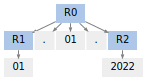

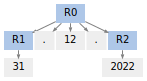

__________________________________________________


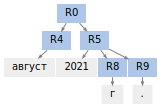

__________________________________________________


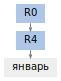

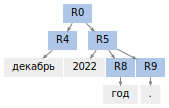

__________________________________________________


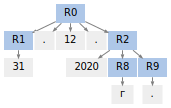

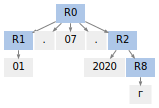

__________________________________________________


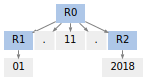

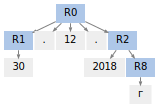

__________________________________________________


In [3]:
from ipymarkup import show_span_box_markup as show_markup
from yargy import Parser

parser = Parser(DATE)

for sentens in lines:
    matches = list(parser.findall(sentens))
    spans = [_.span for _ in matches]
    show_markup(sentens, spans)
    for m in matches: 
        display(m.tree.as_dot)
    print('_'*50)    